# Breast Cancer EDA

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('./data/data.csv')

### Dataset preview

Below is the first 5 rows of the dataset, showing features like radius, etxture, perimeter, etc., along with the `diagnosis` label (`M` = Malignant, `B` = benign).

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

### Dropping Useless Columns

The `Unnamed: 32` column contains only `NaN` values, so we drop it.

In [5]:
df.drop(columns='Unnamed: 32', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The `id` column does not contribute to the diagnosis and is therefore dropped.

In [7]:
df.drop(columns='id', axis=1, inplace=True)

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Statistical Summary

Descriptive statistics (mean, standard deviation, min, max, quartiles) for each feature.

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Target Class Distribution

The dataset is slightly imbalanced, with more benign (`B`) cases than malignant (`M`).

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
label_encode = LabelEncoder()

labels = label_encode.fit_transform(df['diagnosis'])
df['target'] = labels

df.drop(columns='diagnosis', axis=1, inplace=True)

In [12]:
df['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

In [13]:
df.groupby('target').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


### Descriptive Statistics

Summary of central tendency, spread, and shape of the feature distributions.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='target', ylabel='count'>

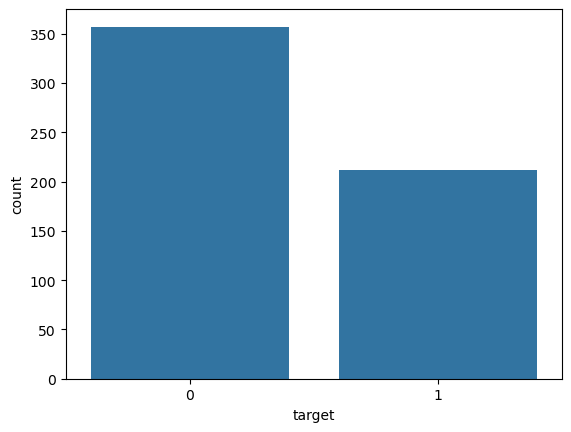

In [15]:
sns.countplot(x='target', data=df)

### Histogram of All Features

/opt/anaconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


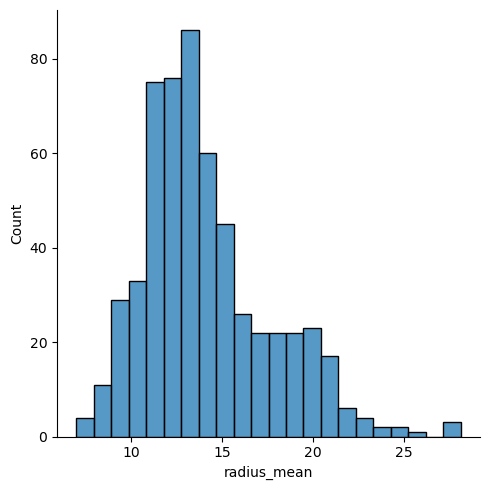

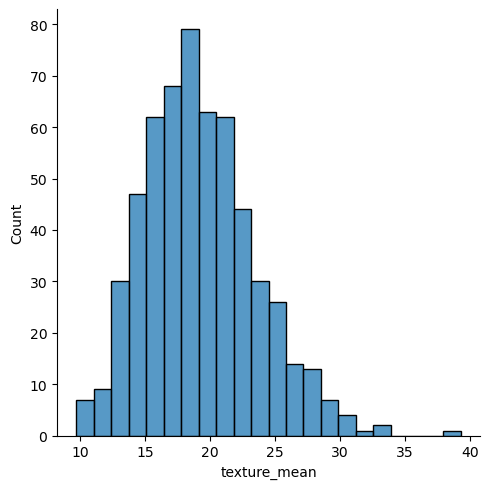

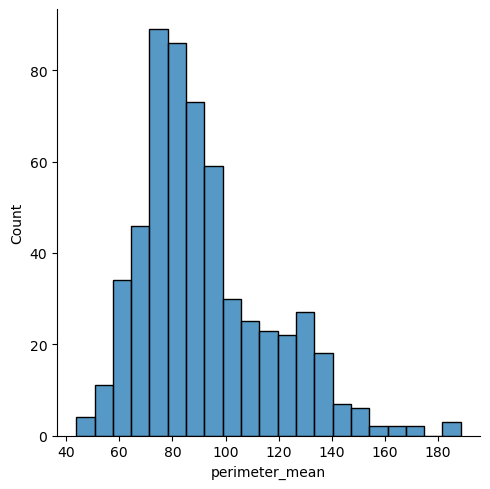

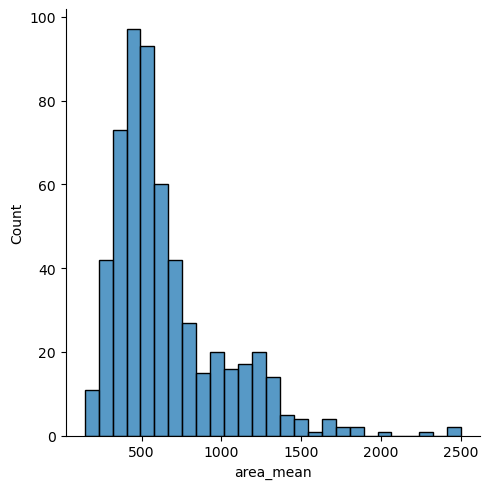

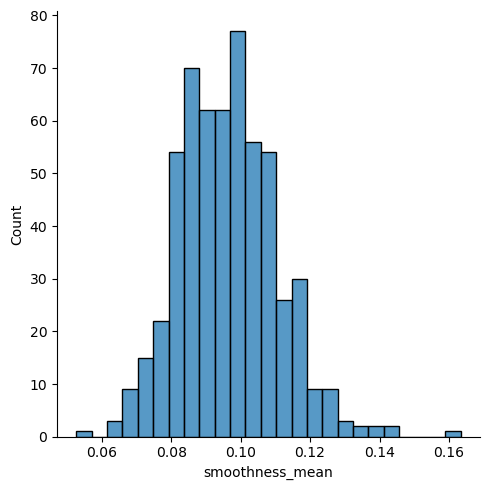

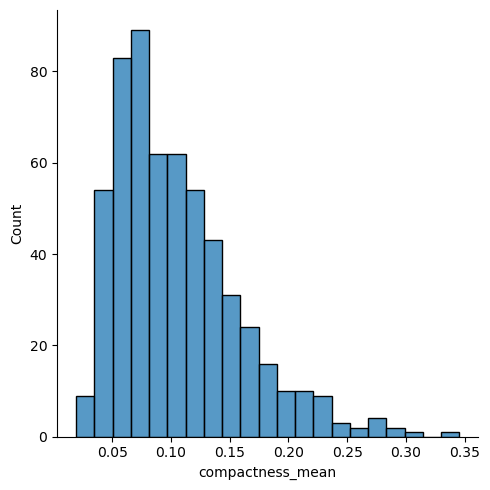

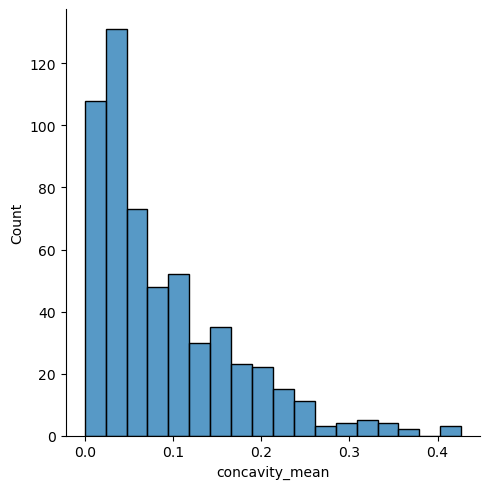

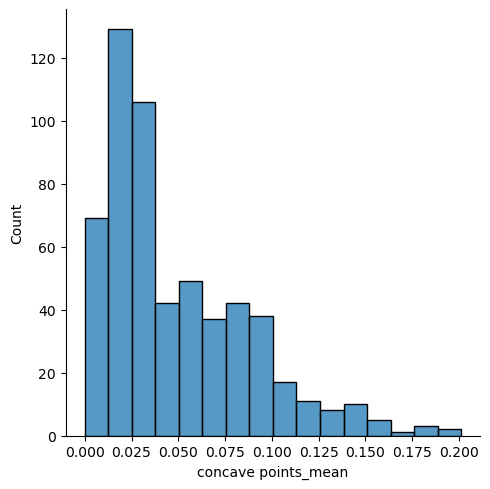

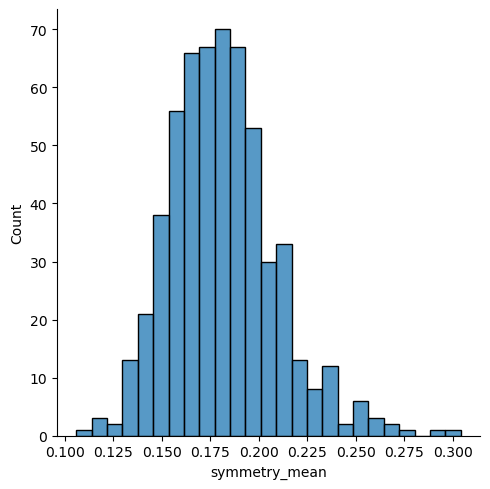

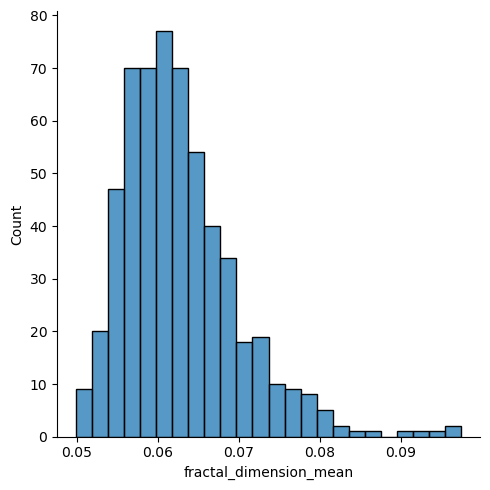

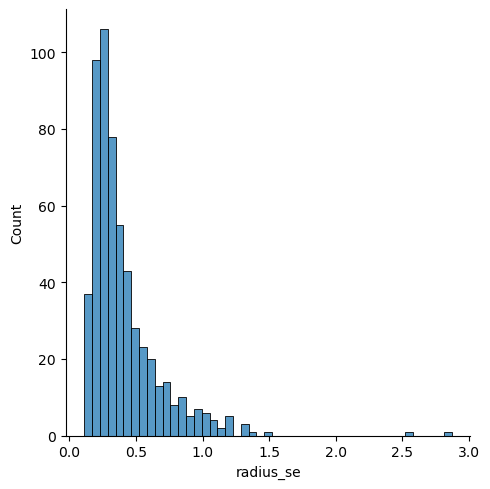

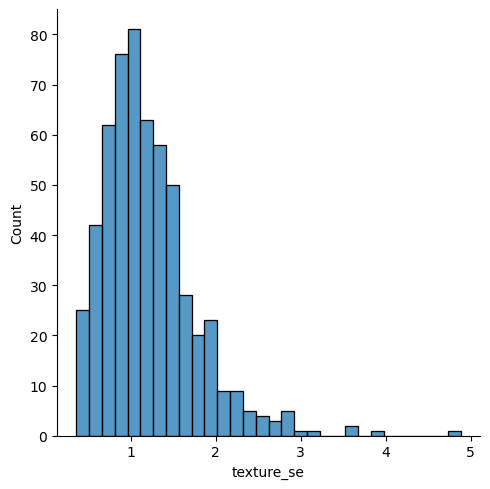

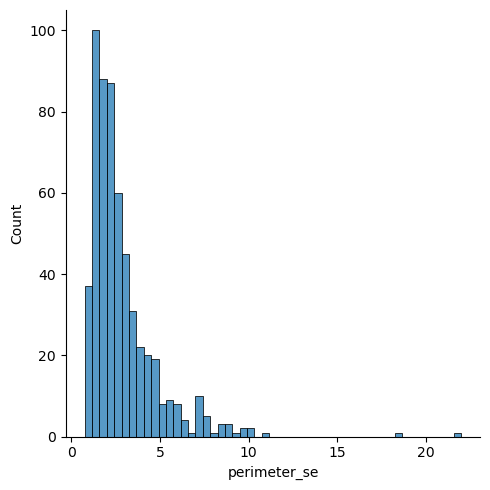

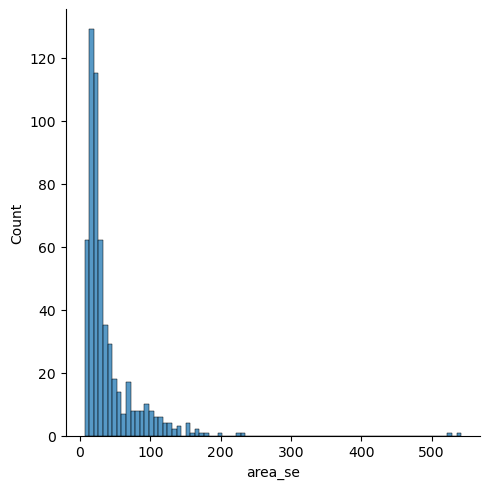

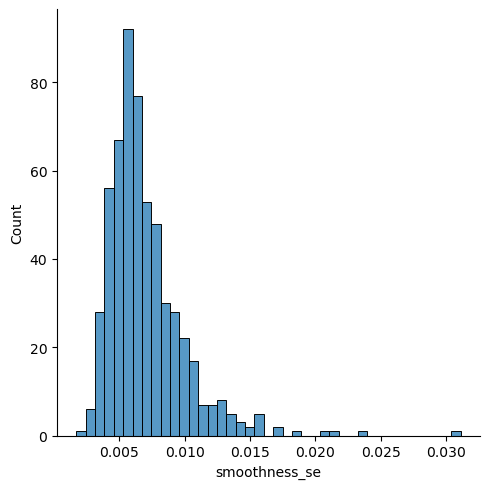

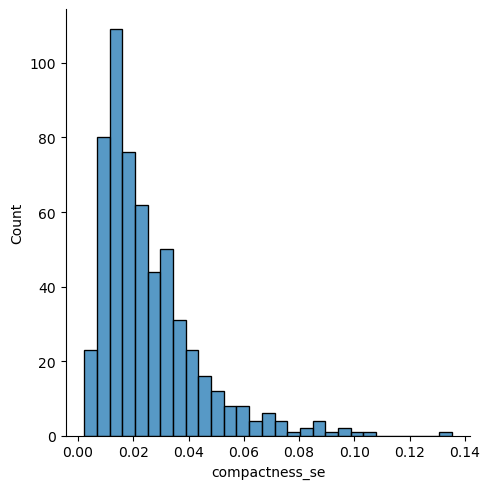

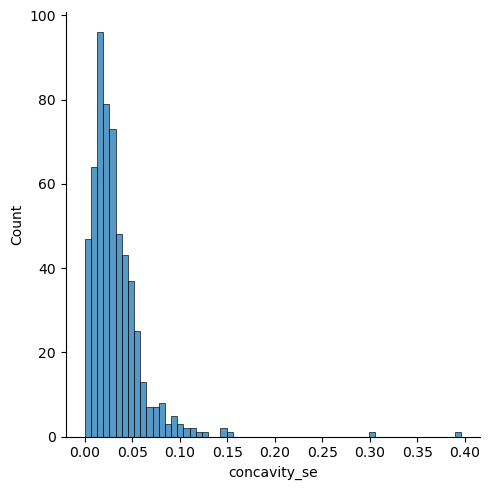

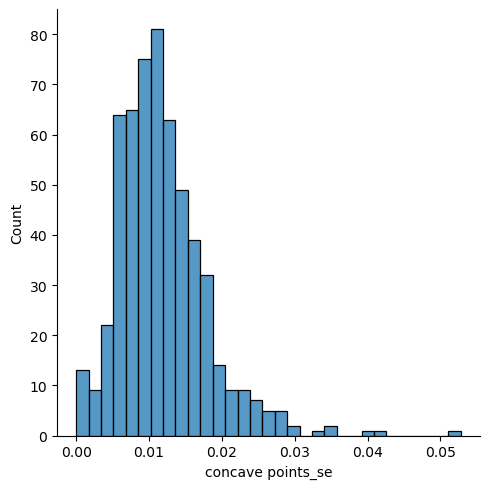

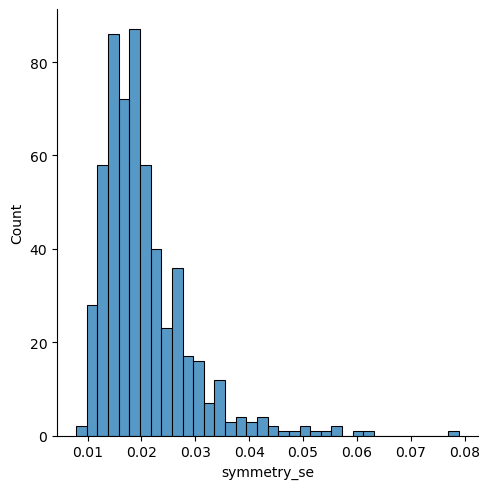

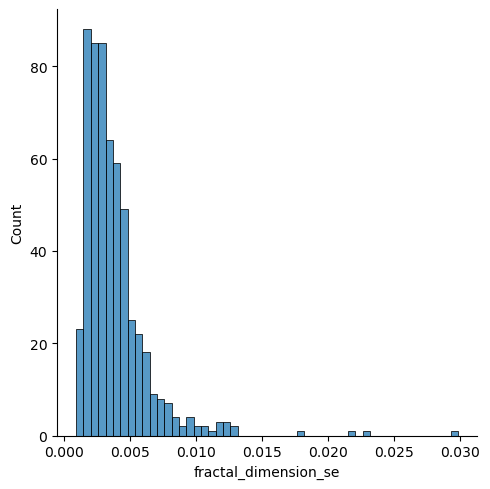

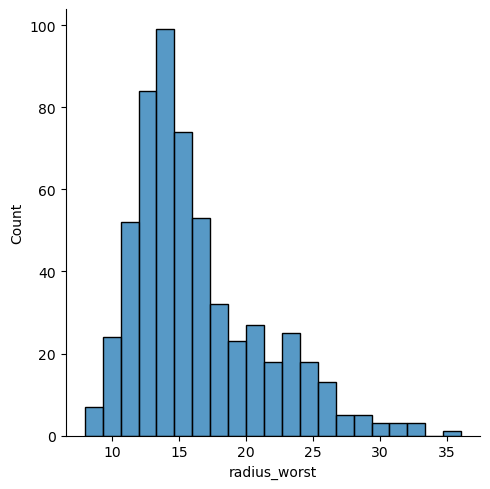

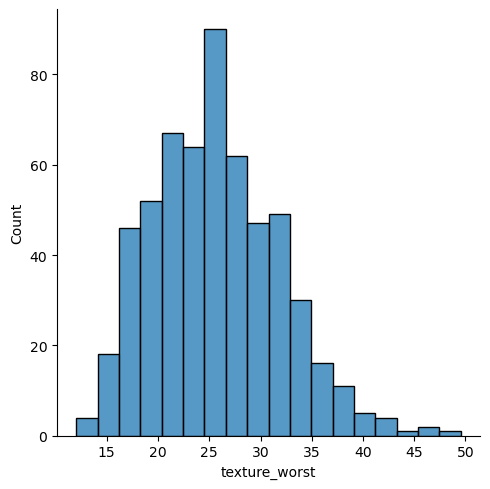

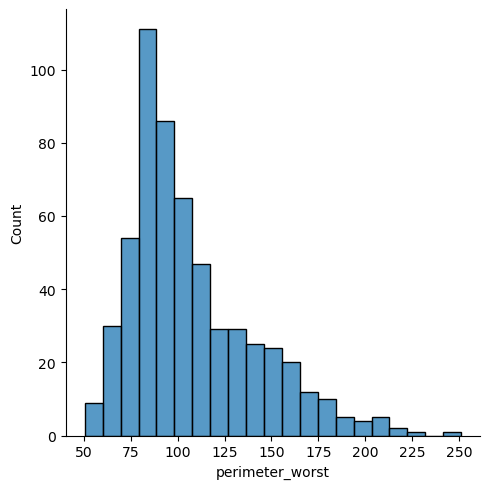

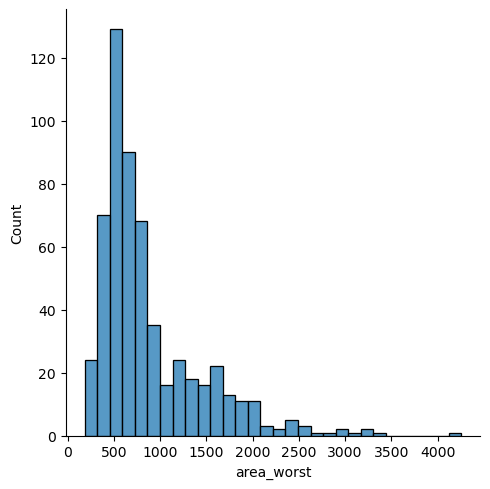

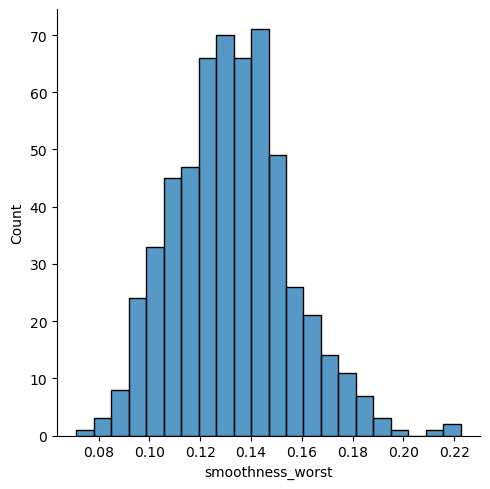

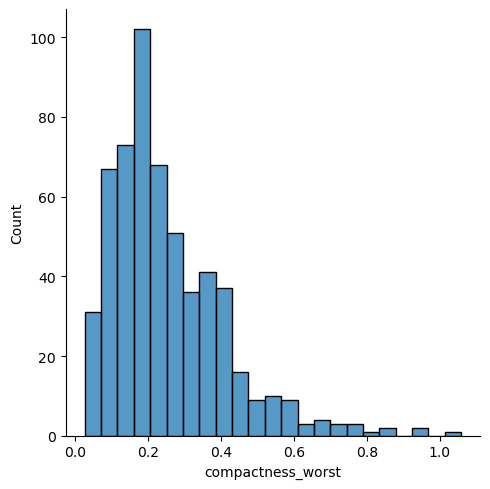

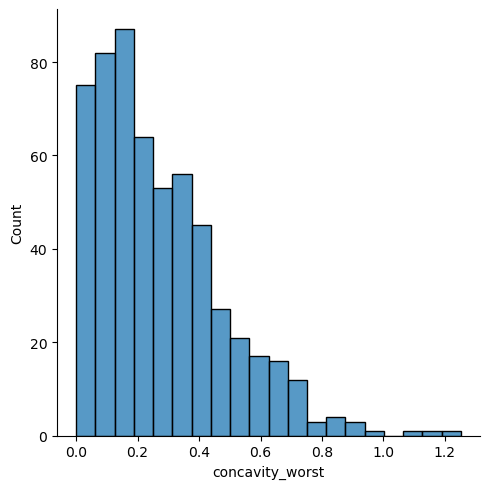

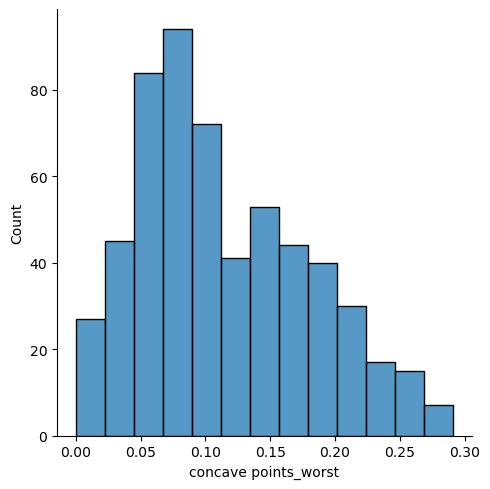

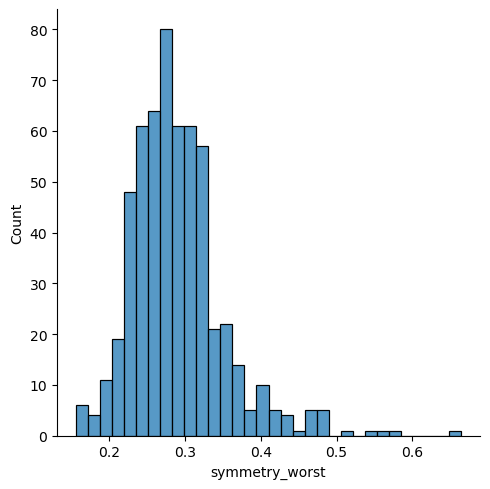

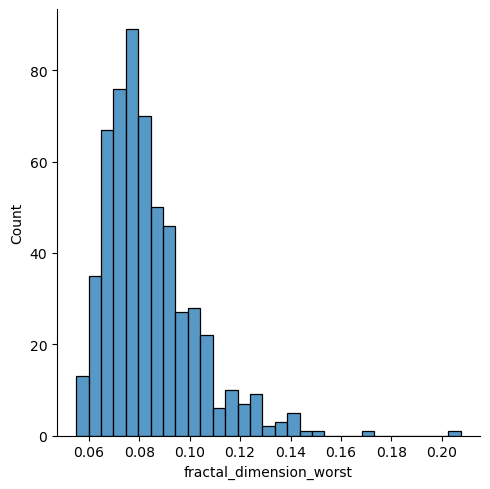

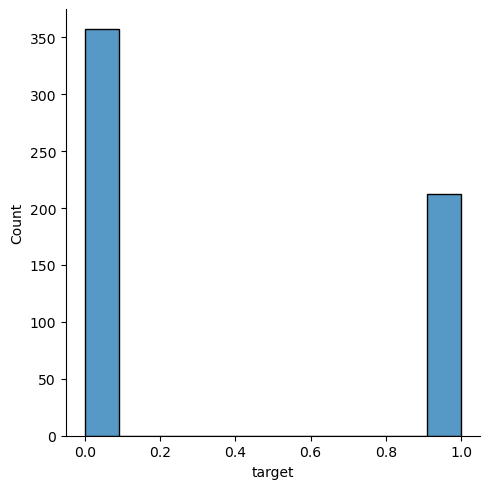

In [16]:
for column in df:
    sns.displot(x=column, data=df)

### Boxplots to Detect Outliers

/var/folders/71/xbr7jjyd7j76ypm3wty_l16c0000gn/T/ipykernel_7472/3950256259.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


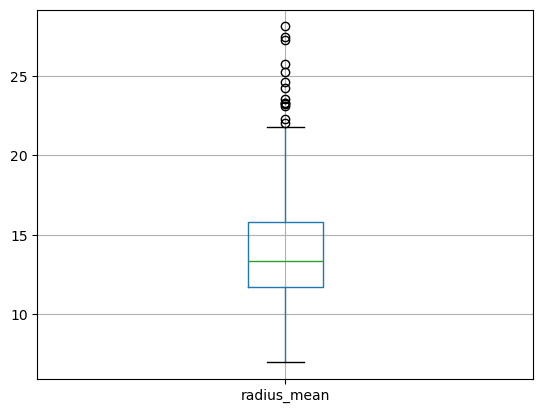

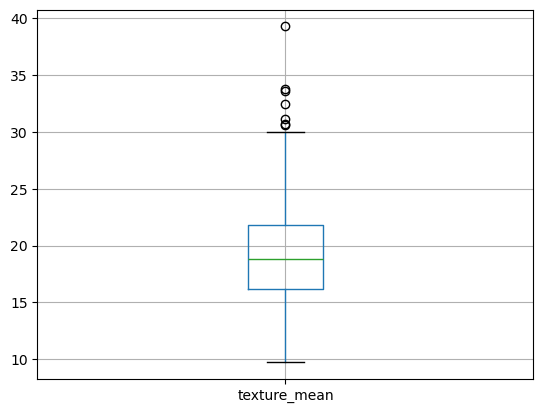

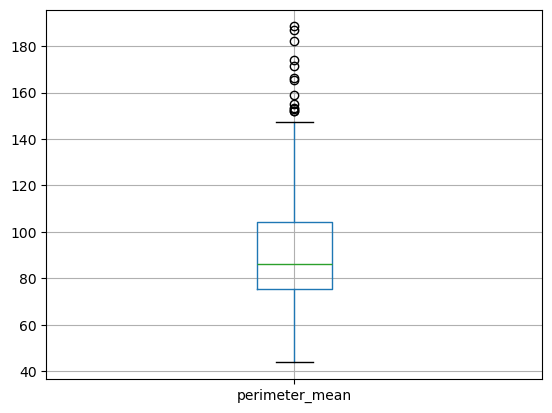

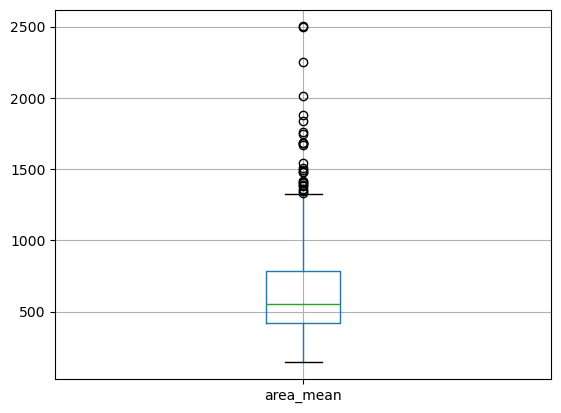

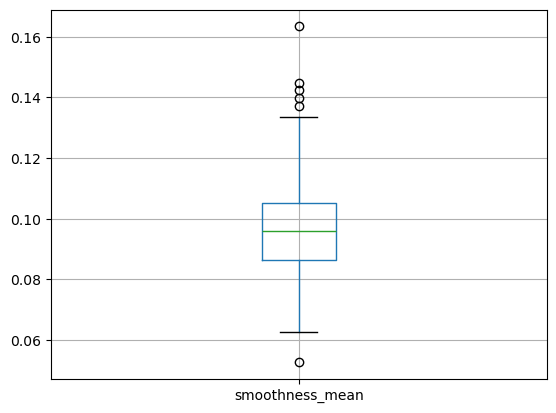

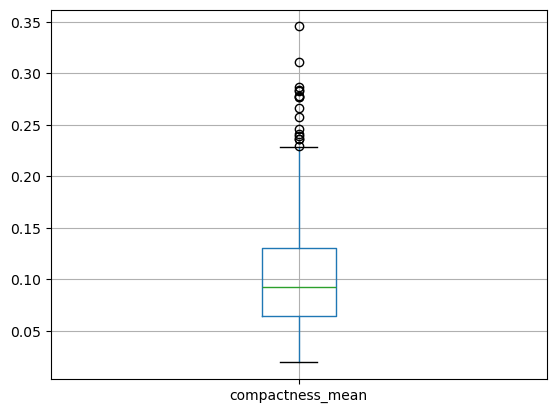

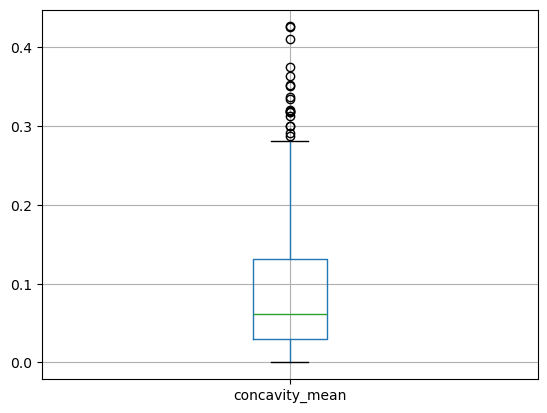

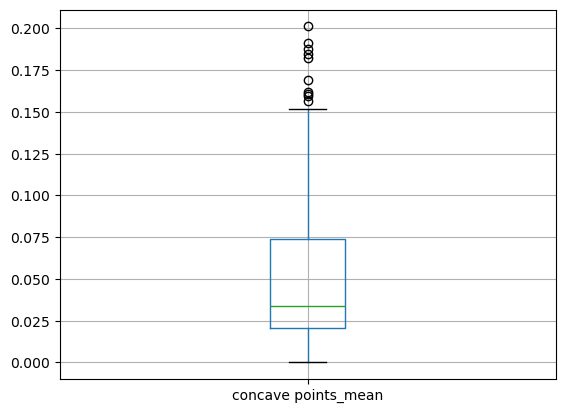

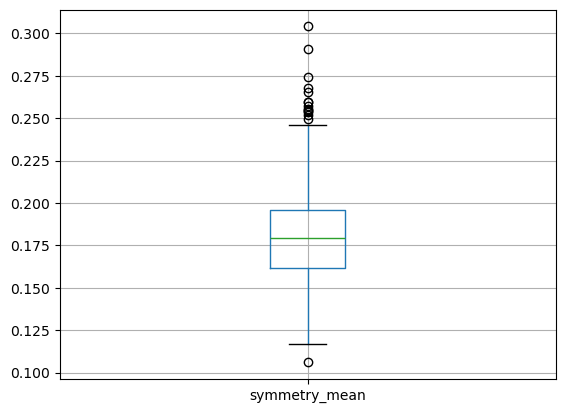

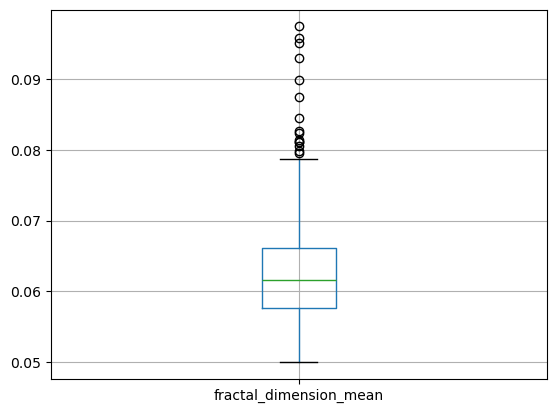

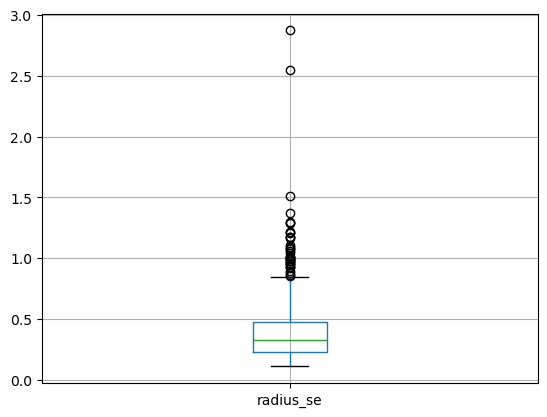

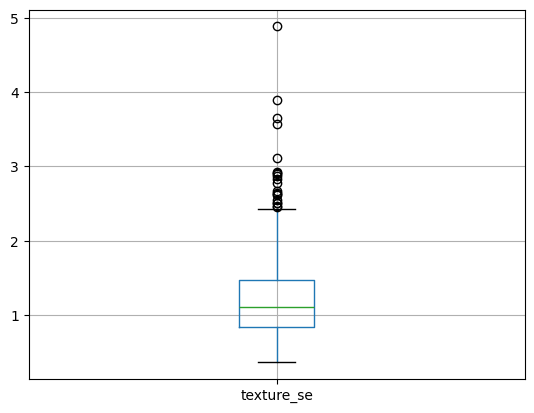

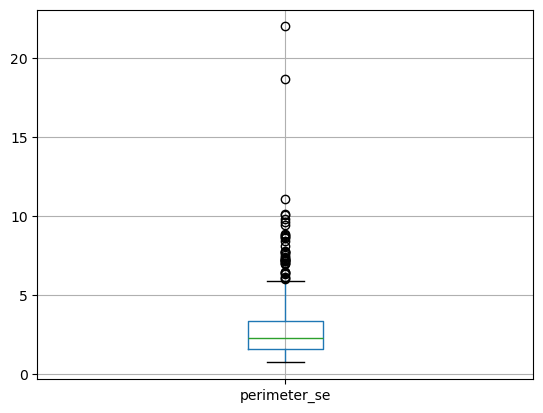

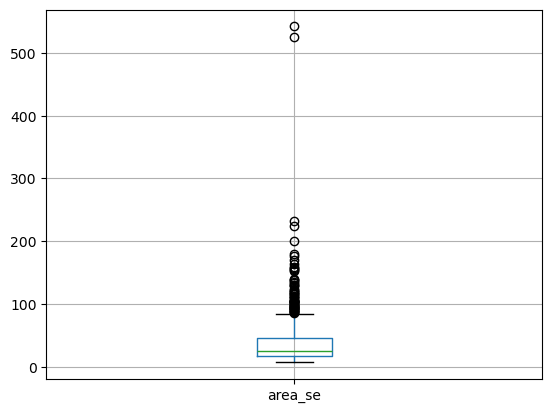

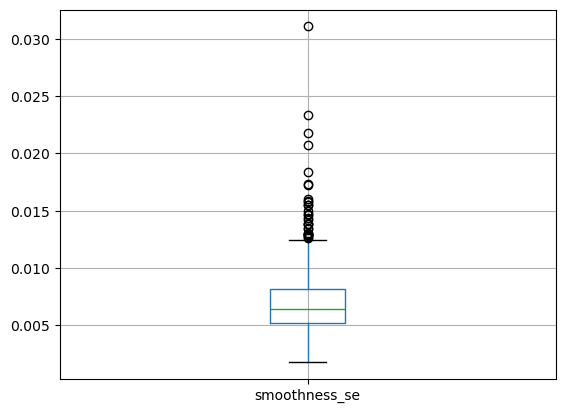

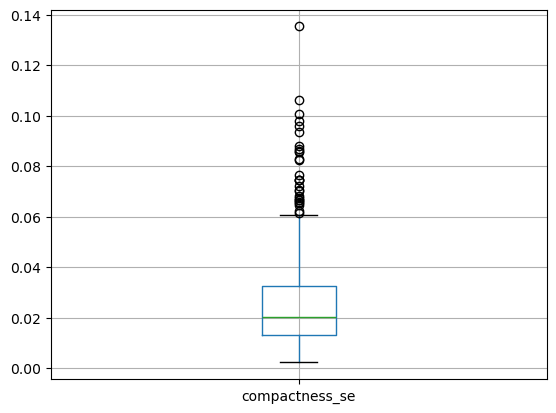

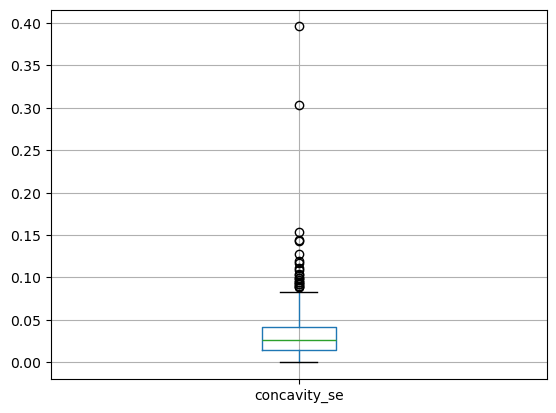

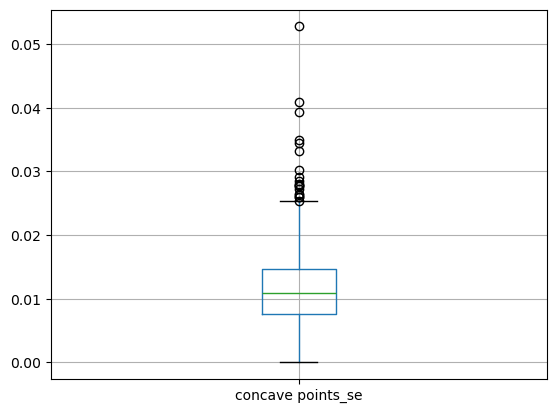

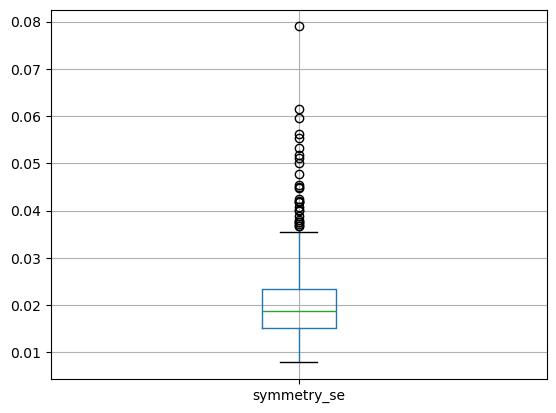

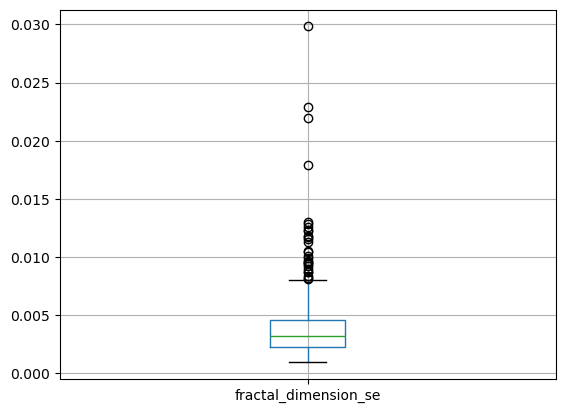

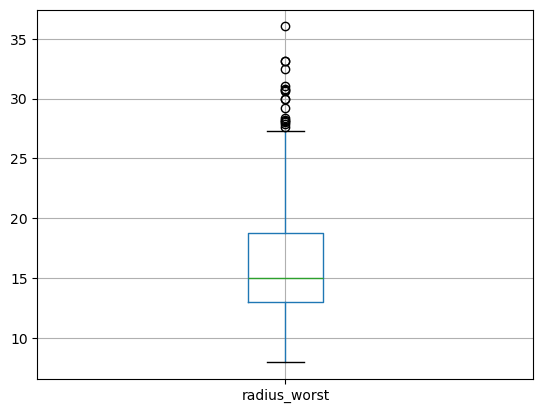

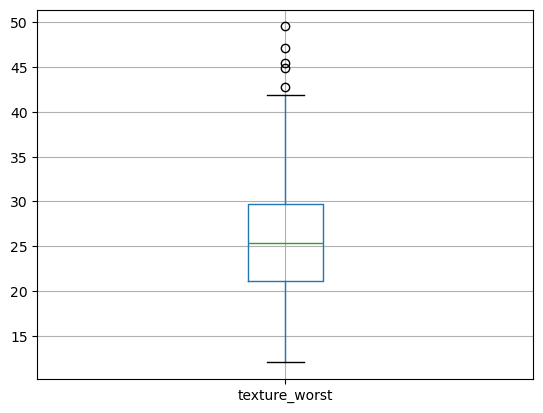

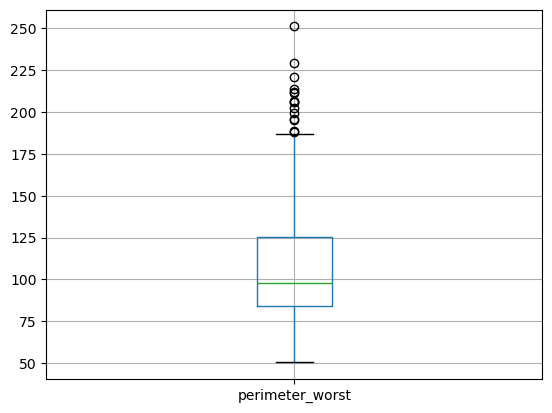

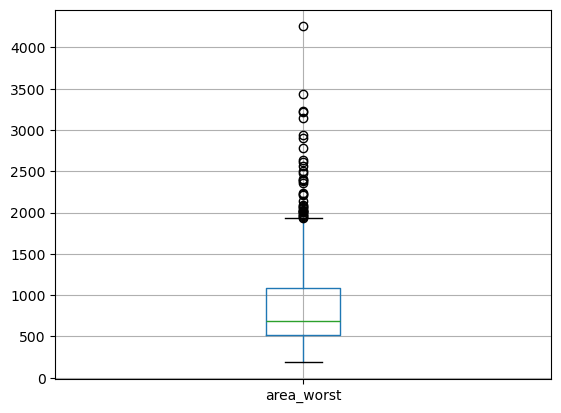

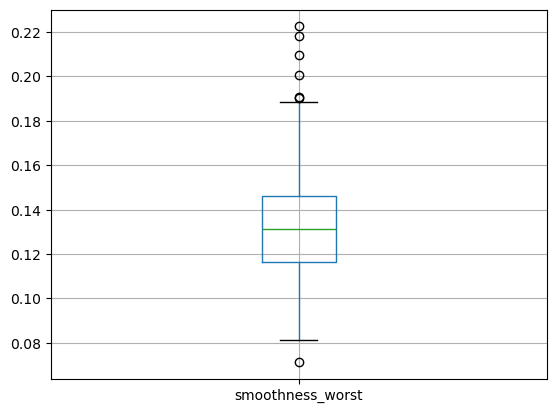

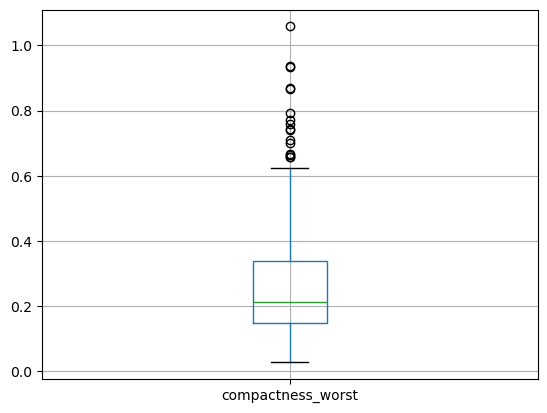

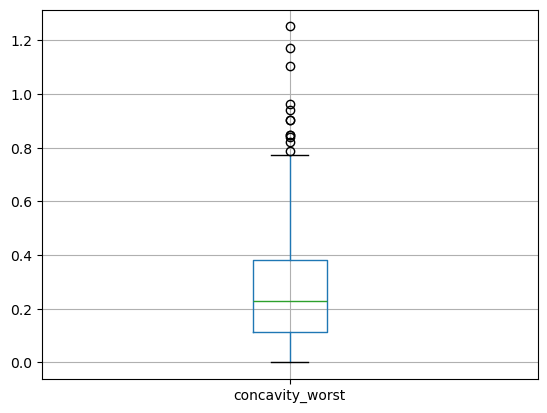

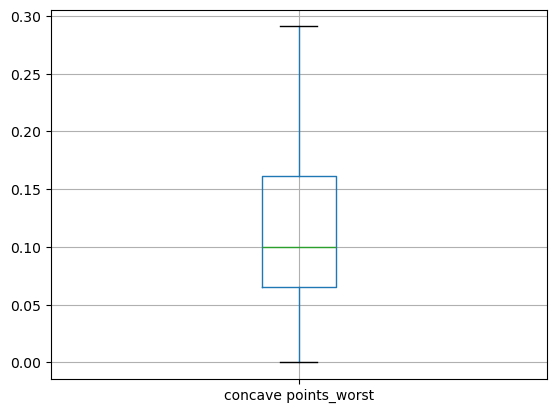

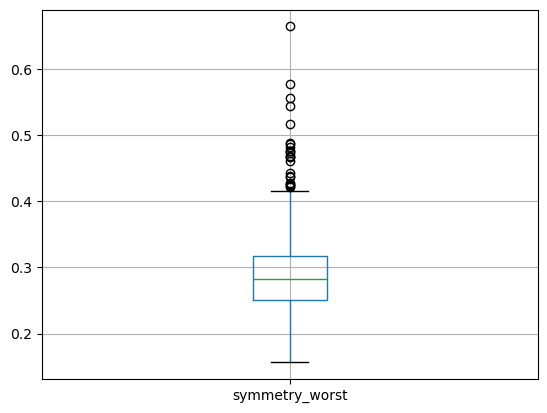

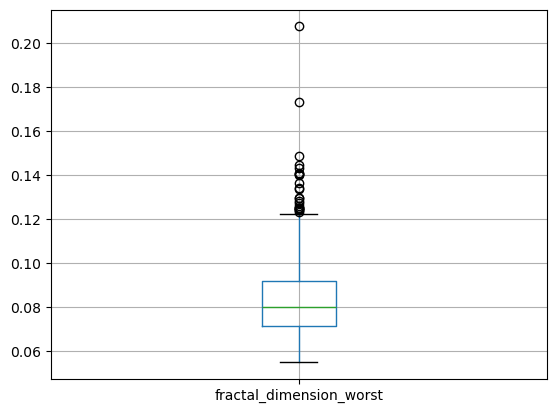

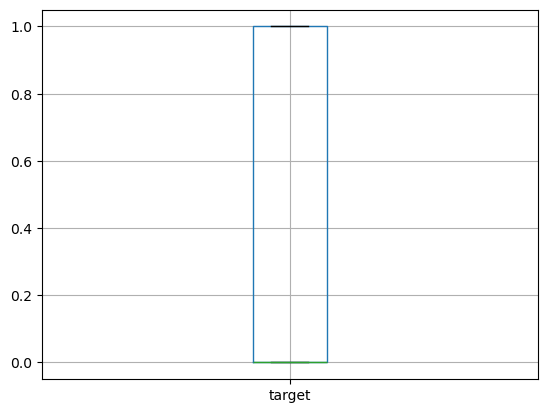

In [17]:
for column in df:
    plt.figure()
    df.boxplot([column])

### Correlation Heatmap

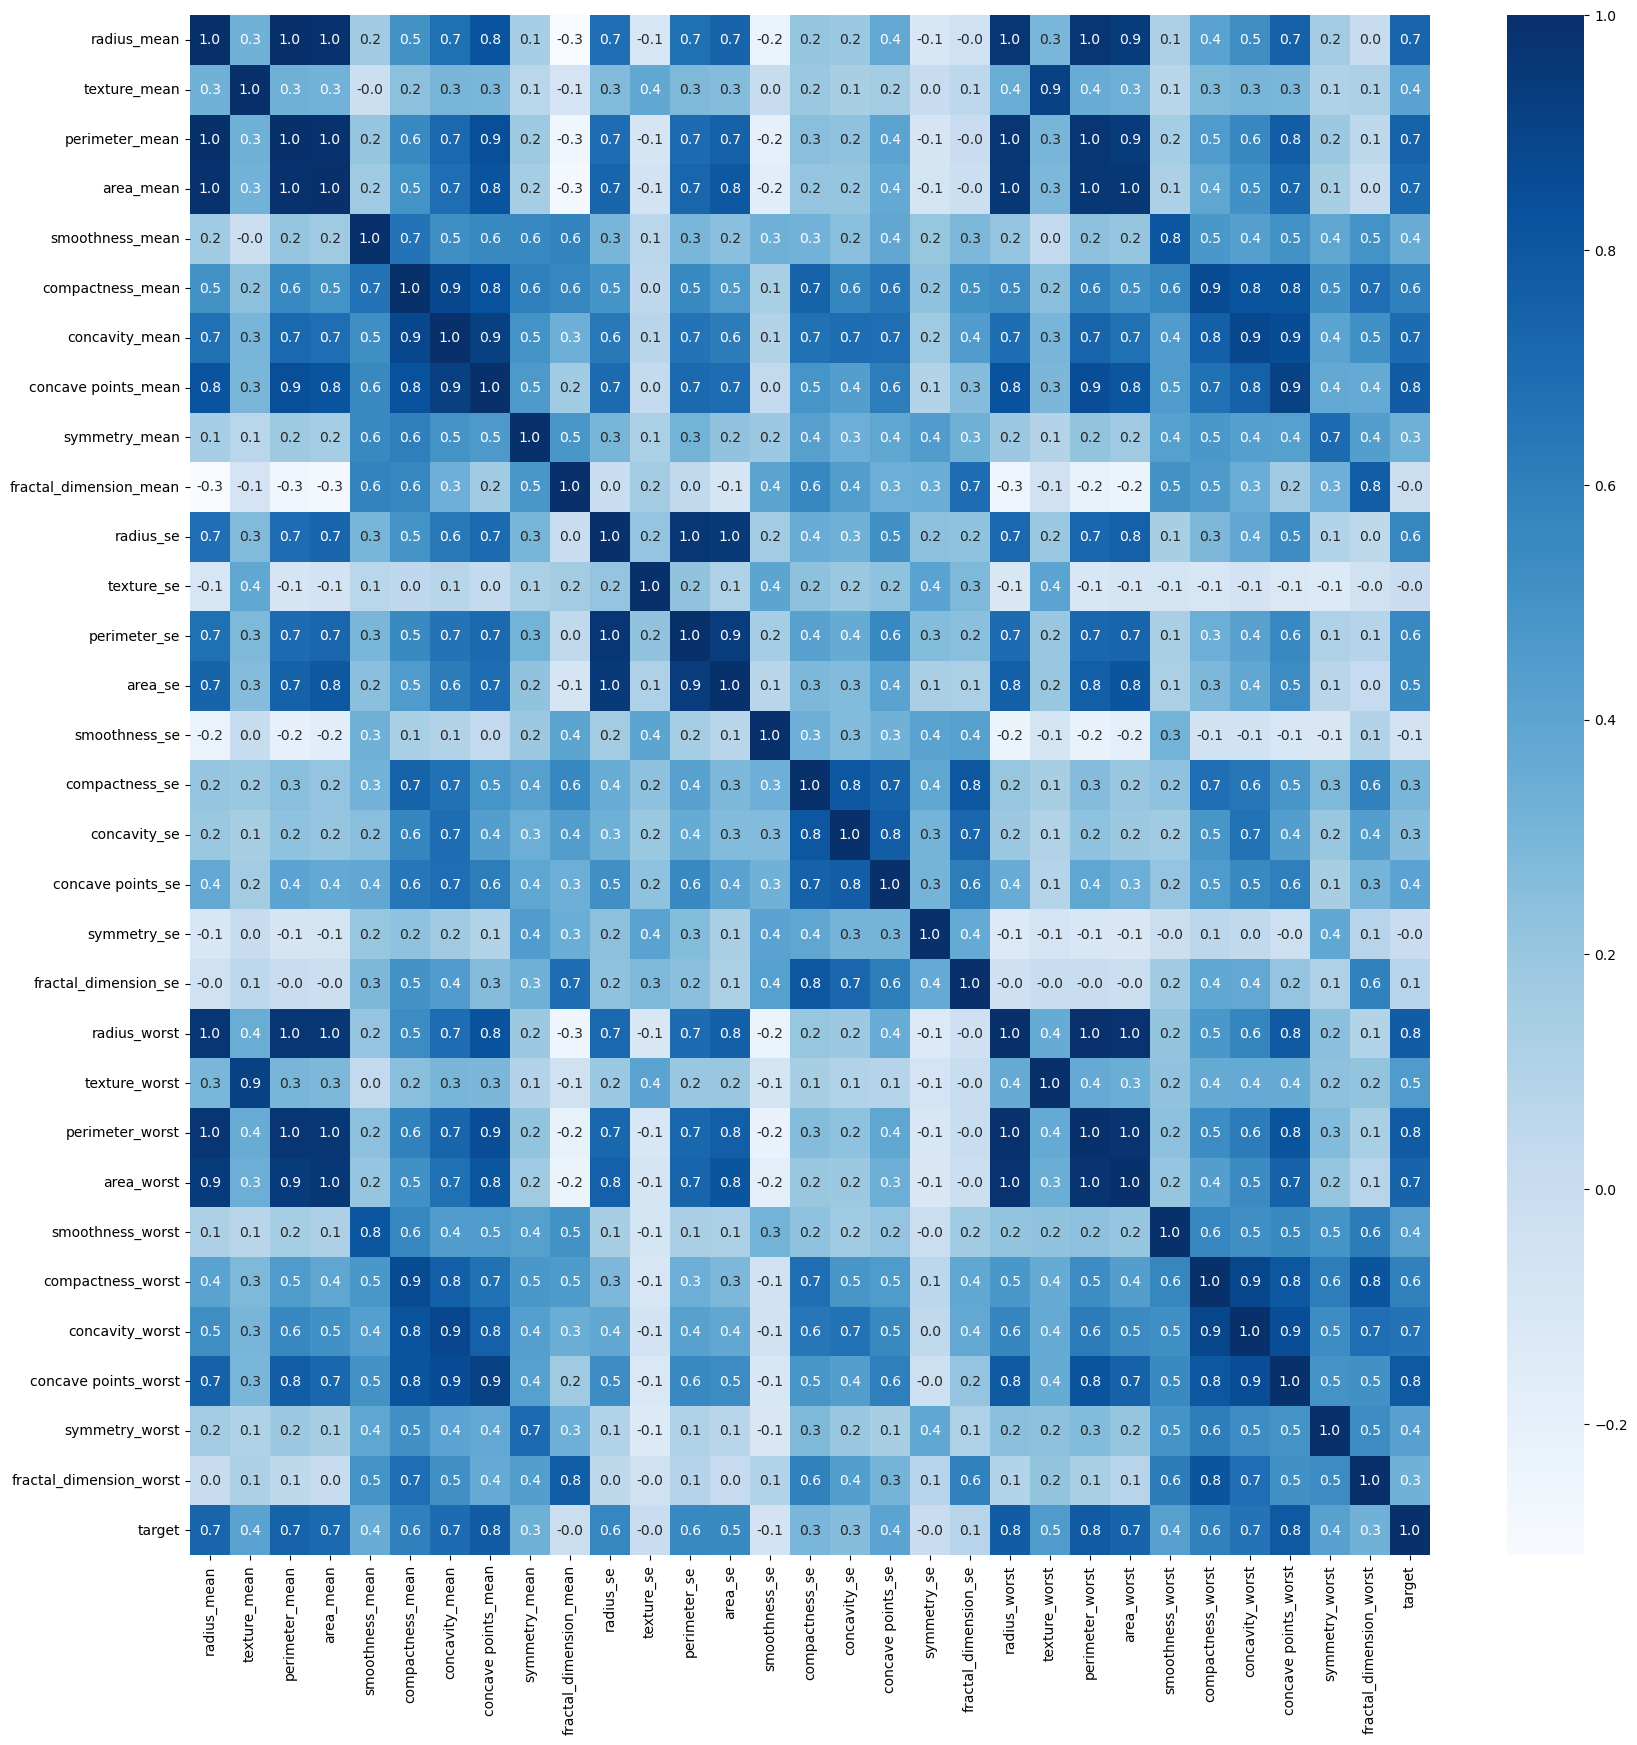

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

Highly correlated features:
- `radius_mean`, `perimeter_mean` and `area_mean` are strongly positively correlated.
- Similar storng correlations can be seen among their `_worst` and `_se` counterparts

Lower or negative correlation:
- Features like `fractal_dimension_mean` and `symmetry_se` have weak or slightly negative correlations with most others.

Target correlations:
- `concave points_mean`, `radius_mean`, and `area_mean` have relatively high positive correlation with the target variable.
- This suggests that they could be good predictors of whether a tumor is malignant (1) or benign (0).

### Pairplot of selected features

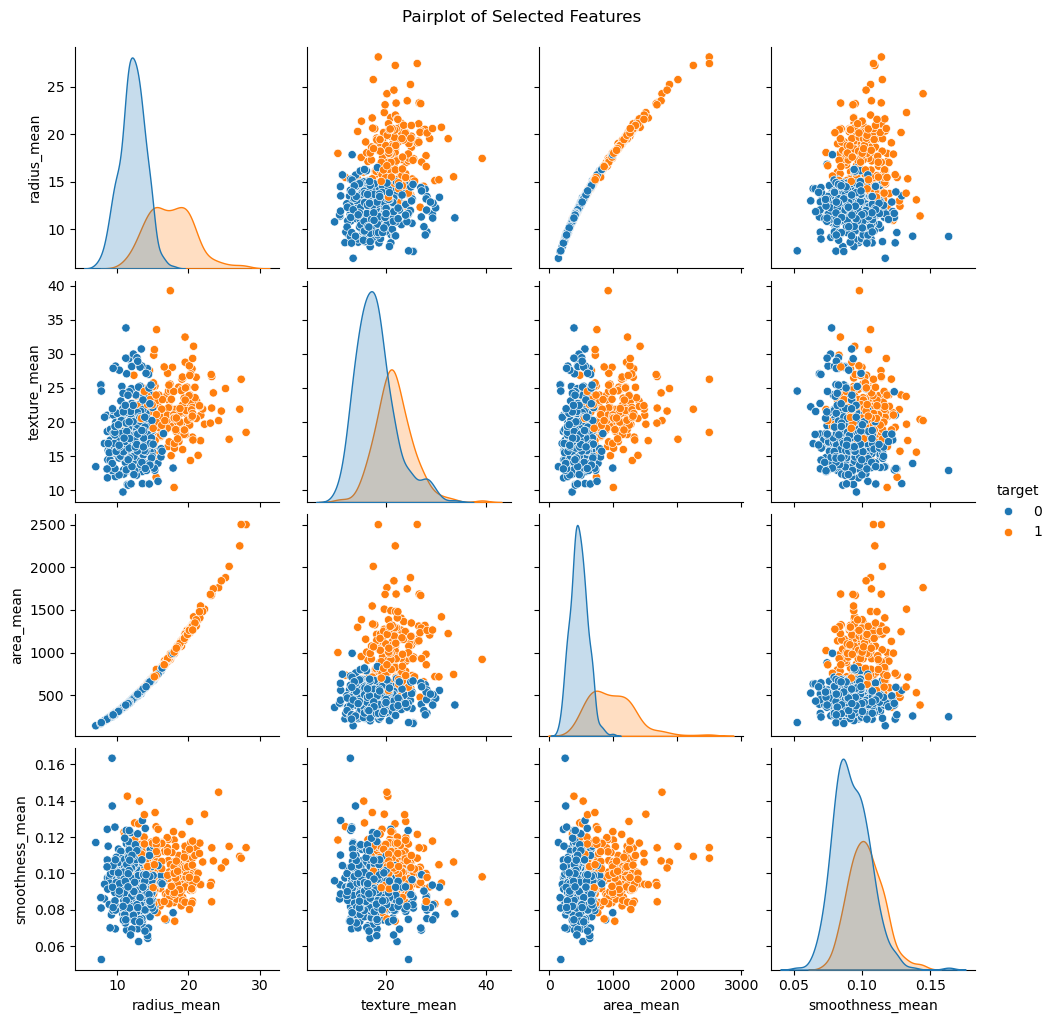

In [19]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'target']], hue='target')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.savefig('Pairplot of selected features')
plt.show()

This pairplot shows relationships between four selected features: radius_mean, texture_mean, area_mean, and smoothness_mean. The hue is set to target, which distinguishes between benign (blue) and malignant (orange) tumors.

`radius_mean` vs. `area_mean`:
- Strong positive correlation; the points form a clear curved pattern.
- Malignant tumors (orange) generally have higher values for both.
- They also show some separation between classes, where malignant cases skew to the right.

Distributions:
- `radius_mean` and `area_mean` have distinct distributions for the two target classes, making them potentially strong predictors.
- `texture_mean` and `smoothness_mean` show some overlap but still have minor class differences.

Scatter patterns:
- Malignant cases (orange) tend to cluster differently than benign cases (blue), especially in `radius_mean` vs `area_mean`.

### EDA Summary:
- `radius_mean`, `area_mean` and `concave points_mean` are very promising features for classifying tumors.
- Class separation is visible, suggesting that a classification algorithm could learn useful decision boundaries from these features.
- There are redundant variables: `concativity_mean`, `perimeter_mean`, `perimeter_worst` that could be dropped to reduce multicollinearity.

### Final Feature Set for Modeling

Selected non-redundant and most informative features:
- `radius_mean`
- `area_mean`
- `texture_mean`
- `smoothness_mean`
- `compactness_mean`
- `concave points_mean`
- `radius_worst`
- `symmetry_mean`
- `fractal_dimension_worst`

Random Forest or SHAP for feature importance could be used to adjust this set. 